In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

<b>Dataset overview </b>

In [7]:
df_train

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [45]:
df_train.shape

(1168, 17)

&rarr; _Insight :_ This dataset contains 1168 rows and 17 columns. The values in the GarageCars column are numbers written in english, which means it is unusable in this state. For further analysis, we could remove this column, or translate the strings into actual numbers.

In [46]:
print("Sample of the dataset:")
df_train.sample(10)

Sample of the dataset:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
481,3,1,6.0,1,1965.0,two,502,0,92,0,96,0,0,0,10,2008.0,179900
493,2,1,5.0,0,1957.0,one,308,0,0,0,0,0,0,0,7,2006.0,129900
1301,3,1,7.0,1,1988.0,two,454,60,55,0,0,154,0,0,4,2007.0,277000
484,2,1,4.0,0,1938.0,one,273,144,20,80,0,0,0,0,12,2009.0,91300
334,3,1,7.0,1,1998.0,two,583,78,73,0,0,0,0,0,6,2009.0,213250
1457,3,1,6.0,0,1954.0,one,260,390,0,0,0,0,0,0,7,2007.0,139400
921,2,1,4.0,0,-1.0,zero,0,0,96,0,0,0,0,0,7,2009.0,99900
285,3,1,7.0,0,2003.0,two,544,192,23,0,0,0,0,0,5,2006.0,200000
1031,3,1,7.0,0,1992.0,two,484,0,124,0,0,0,0,0,7,2006.0,175900


&rarr; _Insight :_ There is at least one -1 in the GarageYrBlt column, which means there are missing values. We will later check for other negative values, after removing the GarageCars column. Indeed, it contains strings that complicate the analysis.

In [49]:
# checking for NaN values
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


&rarr; _Insight :_ 3 columns (TotRmsAbvGrd, GarageCars, YrSold) contain a NaN value.

In [50]:
# Display info dataset
print("\nSummary info:")
df_train.info()


Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memo

&rarr; _Insight :_ The data types are predominantly integer (int64) with 3 columns being a float (float64) and one column (embarked) object, and one column (GarageCars) Object.

In [52]:
# Display summary statistics
print("\nSummary Statistics:")
print(f"Number of different values per column\n{df_train.nunique()}")
df_train.describe()


Summary Statistics:
Number of different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


&rarr; _Insight :_
* BedroomAbvGr : The mean is 2.872432, and most habitations have 2 or 3 rooms (25th to 75th percentiles). However at least one have 8 rooms.
* KitchenAbvGr : At least 75% of habitations have exactly one kitchen above grade, but at least one has 3.
* TotRmsAbvGrd : There are 1167 values, which means one is missing. There are between 2 and 14 rooms above grade.
* Fireplaces : At least 25% don't have fireplaces, and a minority (less than 25%) have more than 1.
* GarageYrBlt : The minimum value is -1, which generates an abnormal standard deviation. However most (at least 50%) garages were built between 1957 and 2000.
* GarageArea : Very high standard deviation, because of a null value. The majority of garage sizes range from 324 to 576 sq ft.
* WoodDeckSF : High standard deviation, because 50% of people in the dataset don't own a wood deck. The maximum wood deck area is 736 sq ft.
* OpenPorchSF : At least 25% of habitations don't have an open porch, but 50% of them have a porch that is over 24 sq ft.
* EnclosedPorch : At least 75% of habitations don't have an enclosed porch, but someone has a 386 sq ft enclosed porch.
* 3SsnPorch :  At least 75% of habitations don't have a 3 season porch, but someone has a 320 sq ft enclosed porch.
* ScreenPorch :  At least 75% of habitations don't have a screen porch, but someone has a 480 sq ft enclosed porch.
* PoolArea :  At least 75% of habitations don't have a pool, but someone has a 648 sq ft enclosed porch.
* MiscVal : We don't know what this it, but at least 75% of habitations don't have this. However at least one gets a value of 15500.
* MoSold : At least 50% of the sales occured between May and August, which is a period of less than 6 months. There are clearly more sales during summer.
* YrSold : The habitations in this dataset were sold between 2006 and 2010. It seems that the distribution of this feature is pretty uniform according to the percentiles.
* SalePrice : The prices of these sales range from 34900 to 745000 (\$ ?), which induces a large standard deviation. However most habitations were sold for between 13000 to 21225 (\$ ?).

In [55]:
# Check for duplicate rows
print("\nDuplicate rows:")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


&rarr; _Insight :_ The dataset contains 2 duplicate rows out of 1168, which represents approximately 0.2% of the dataset.

<b> Distribution of Numerical Features </b>


Histograms of numerical features:


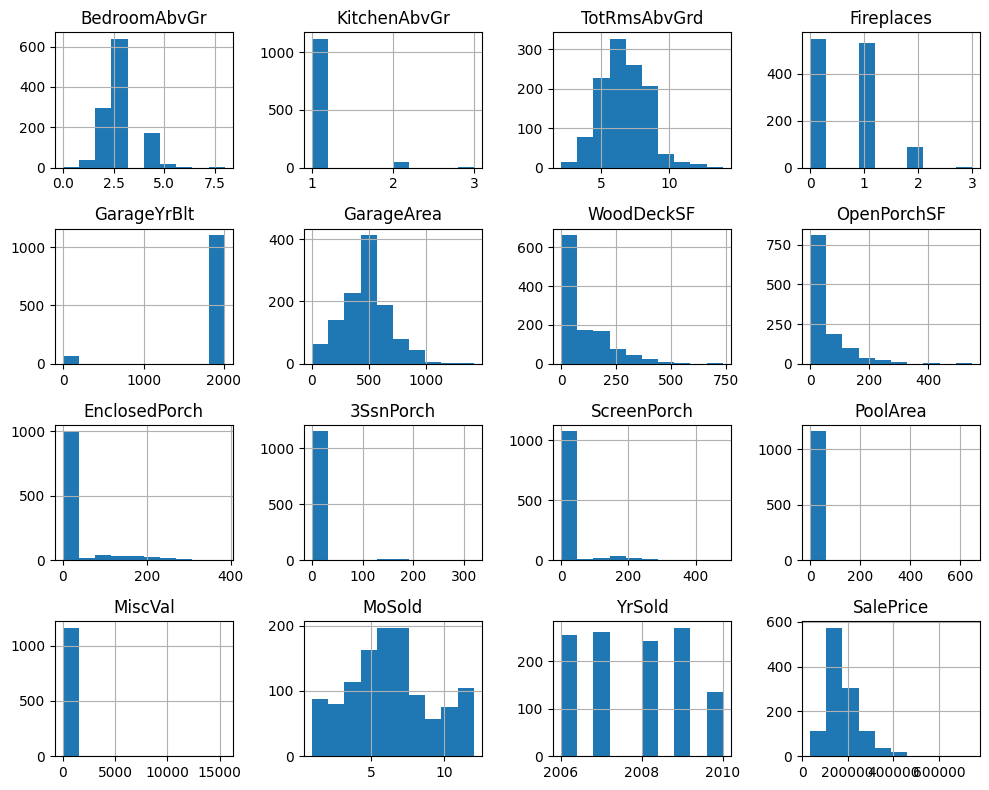

In [56]:
# Histograms for all numerical features
print("\nHistograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

&rarr; _Insight :_
* BedroomAbvGr : The distribution seems centered around 3 bedrooms above grade.
* KitchenAbvGr : A large majority of habitations have 1 kitchen above grade.
* TotRmsAbvGrd : The distribution looks gaussian, centered around 6 rooms above grade.
* Fireplaces : Most habitations have 1 or 2 fireplaces, only few have 3.
* GarageYrBlt : We see the abnormal value -1.
* GarageArea : Looks like a gaussian with mean 500 and high standard deviation.
* WoodDeckSF : Exponential dsitribution ? Many habitations have little wooden deck, few habitations have more surface area
* OpenPorchSF : Exponential distribution ? Many habitations have little open porch, few habitations have more surface area
* EnclosedPorch : an overwhelming majority of homes do not have en enclosed porch.
* 3SsnPorch :  an overwhelming majority of homes do not have a 3 season porch
* ScreenPorch :  an overwhelming majority of homes do not have a screen porch.
* PoolArea :  an overwhelming majority of homes do not have a pool.
* MiscVal : an overwhelming majority of homes do not have this feature.
* MoSold : Looks like a bimodal distribution, with modes in december and july. The summer represents the best sales season.
* YrSold : Approximately uniform, but fewer sales in 2010 for this dataset.
* SalePrice : Exponential distribution ? Mode aroud 15000 \$.

<b>Outlier detection </b>


Box plots to check for outliers:


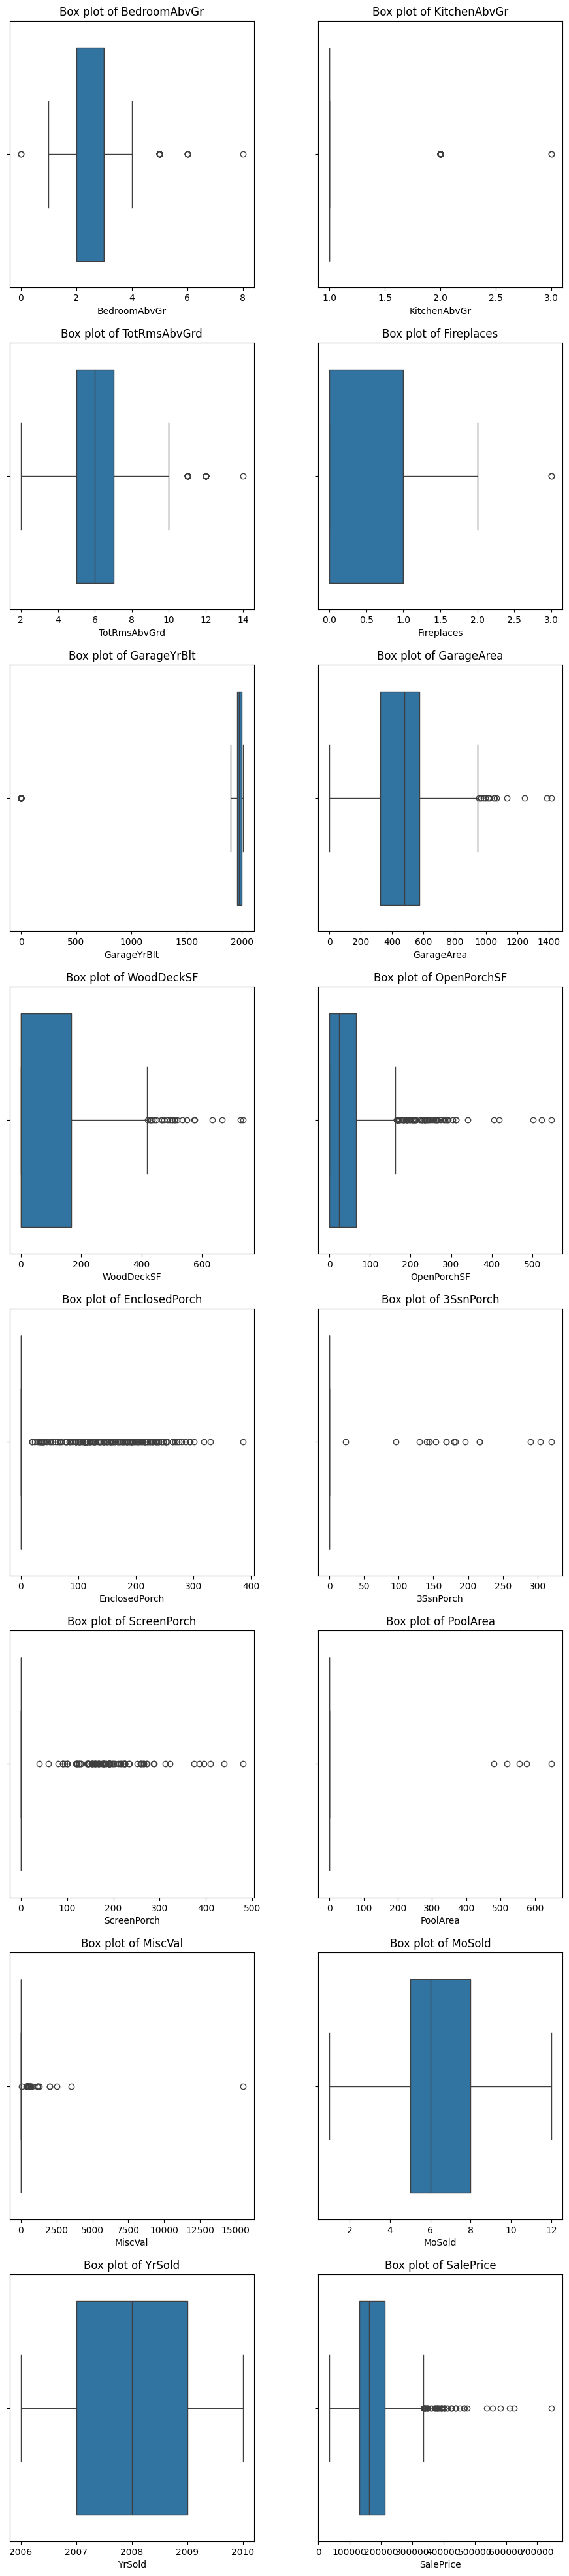

In [57]:
# Box plots for numerical variables to check outliers
print("\nBox plots to check for outliers:")
numeric_cols = ["BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "SalePrice"]

# Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df_train[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()

&rarr; _Insight :_ Lots of outliers in each distribution, especially for the porches and pools features, and the price. These outliers correspond to a minority of homes that have these specifics features, and thus a substancial price.

<b> Correlation analysis </b>

In [4]:
# GarageCars is string type, as we don't know how to manipulate it for the moment, we will remove it
df_train.drop("GarageCars", axis=1, inplace=True)



Correlation matrix:


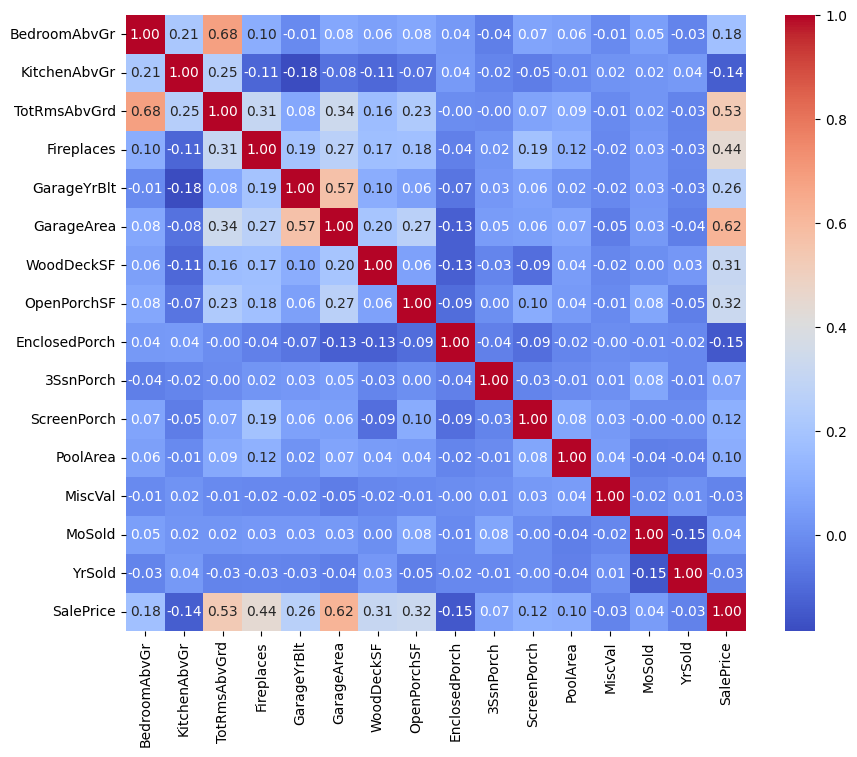

In [63]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

&rarr; _Insight :_ 
* The number of rooms above grade, the number of fireplaces, and the garage area is positively correlated with the sale price. A house that have high valuesfor these features tends to be more expensive.
* We also see that the year the garage was built is positively correlated with its area. More recent garages are larger. 
* The number of bedrooms and the number of rooms are also positively correlated, which is not surprising. 
* The month of the sale is not correlated with its price.


Important correlations with 'Survived':


Text(0.5, 1.0, 'Top Negative Correlations')

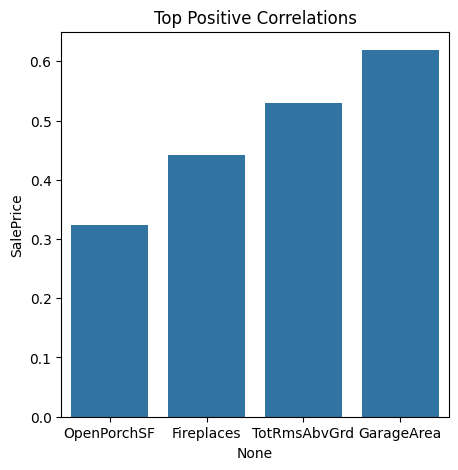

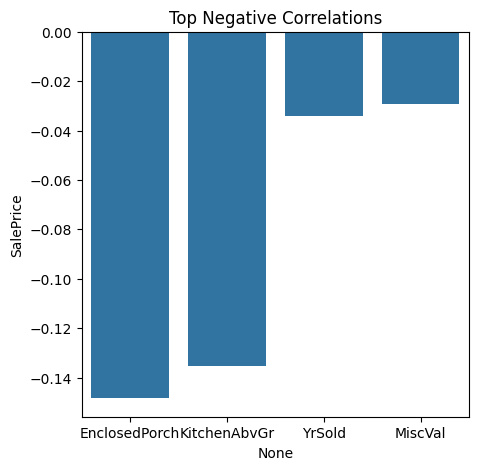

In [65]:
#### Important Correlations with 'Survived'
print("\nImportant correlations with 'Survived':")
corrs = df_train.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")


Pairplot of selected features:


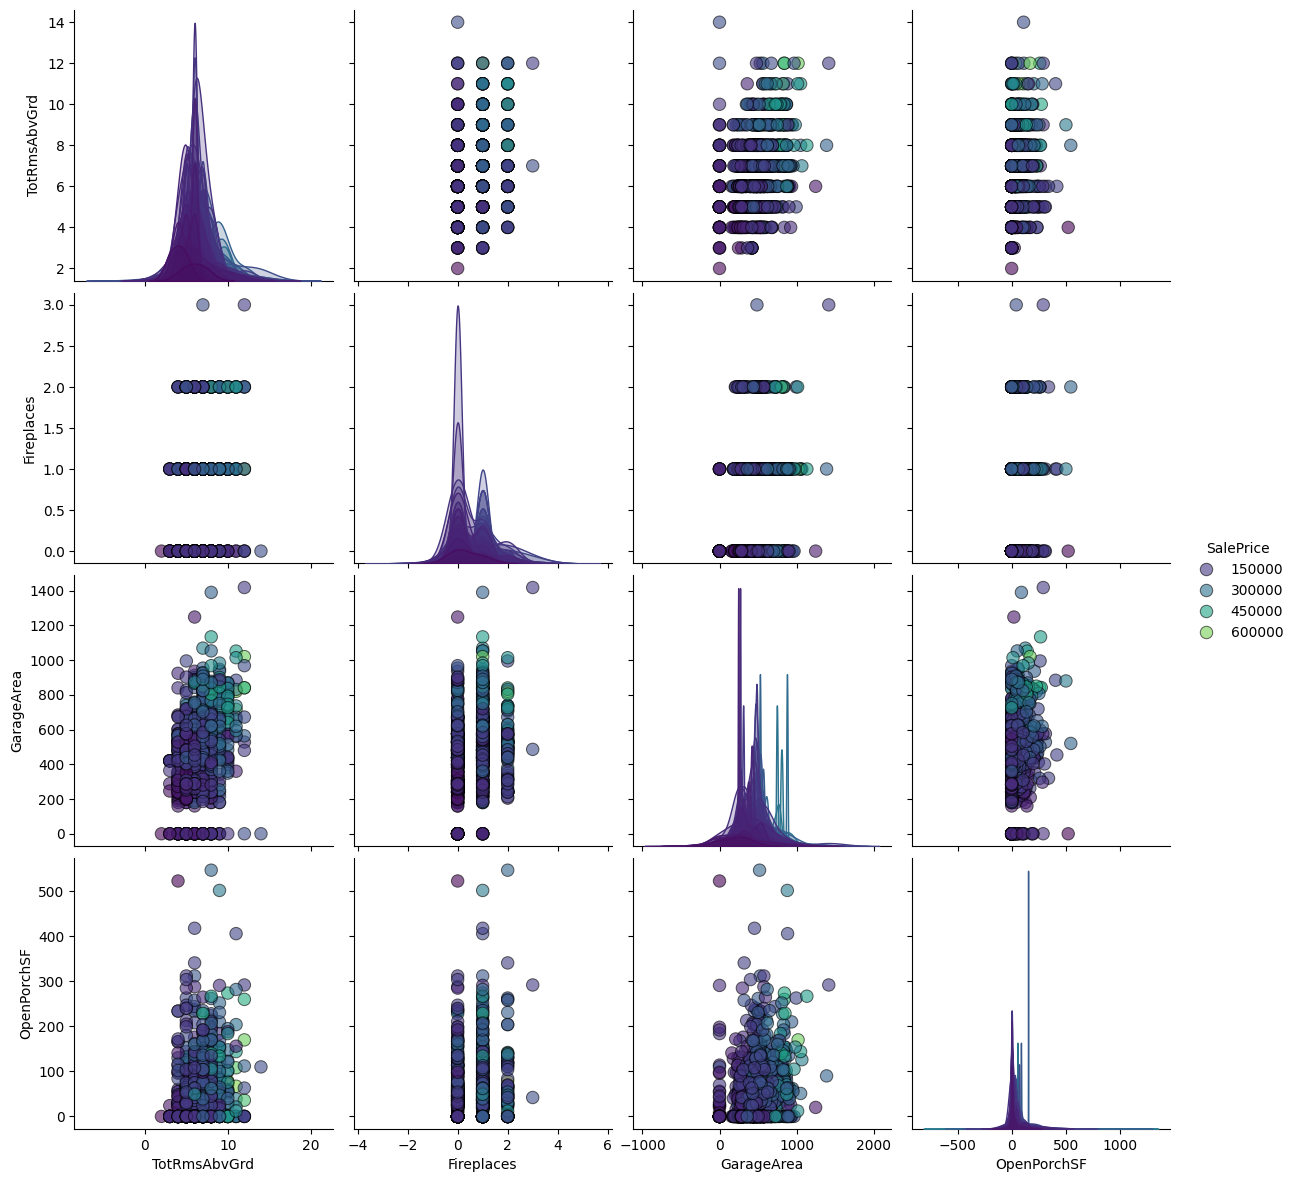

In [6]:
# Pairplot for pairwise relationships in the dataset
print("\nPairplot of selected features:")
selected_features = ["TotRmsAbvGrd", "Fireplaces", "GarageArea", "OpenPorchSF", "SalePrice"]

# Creating pairplot
sns.pairplot(df_train[selected_features], hue='SalePrice', palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)
plt.show()

&rarr; _Insight :_ Green points generally correspond to higher values for the features. This is because we chose variables that are positvely correlated with the price.

<b> Compare distribution of train and test data </b>

In [7]:
# Read test and apply same changes as train
X_test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')
X_test.drop("GarageCars", axis=1, inplace=True)

In [8]:
X_test.shape

(292, 15)

In [9]:
X_test.isnull().sum() # for every featuers, counts the number of null values

BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       1
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    1
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

&rarr; _Insight :_ There are null values for the Fireplaces and EnclosedPorch features (exactly 1 for each).

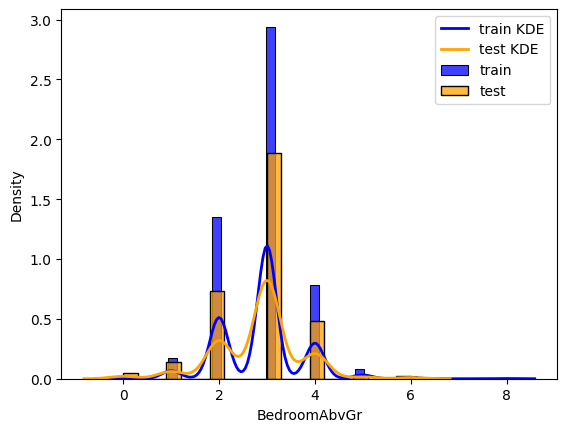

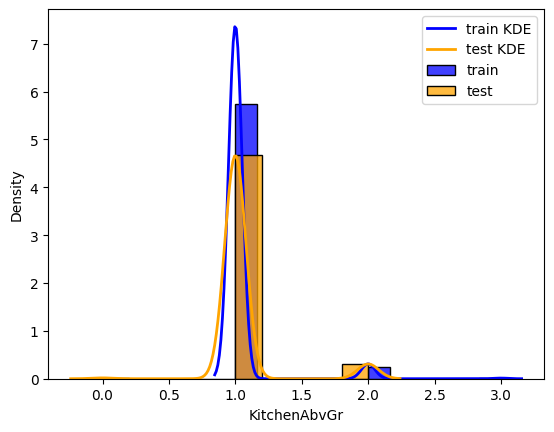

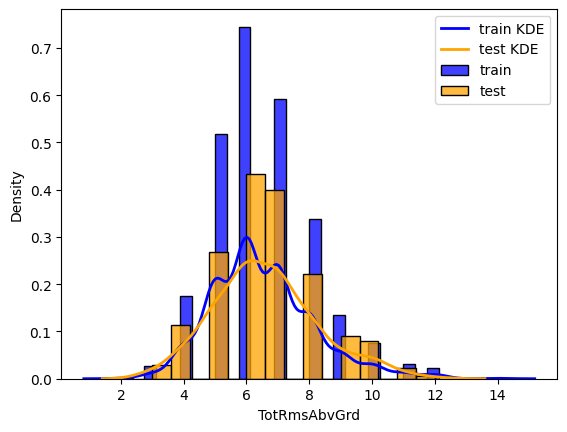

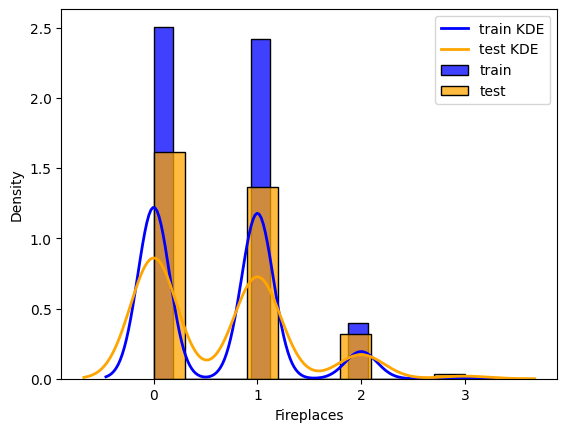

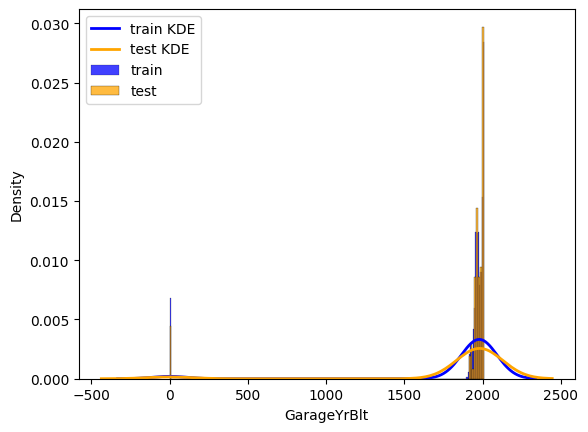

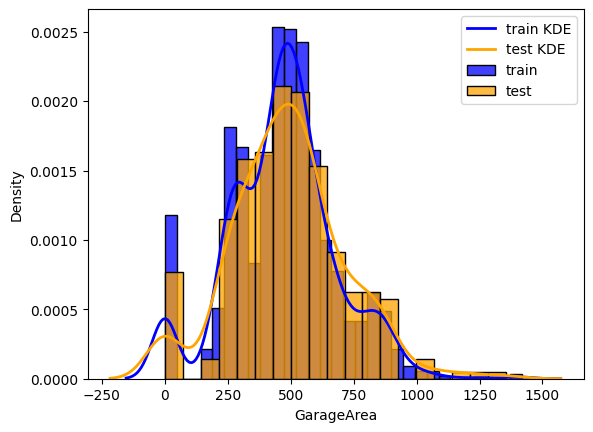

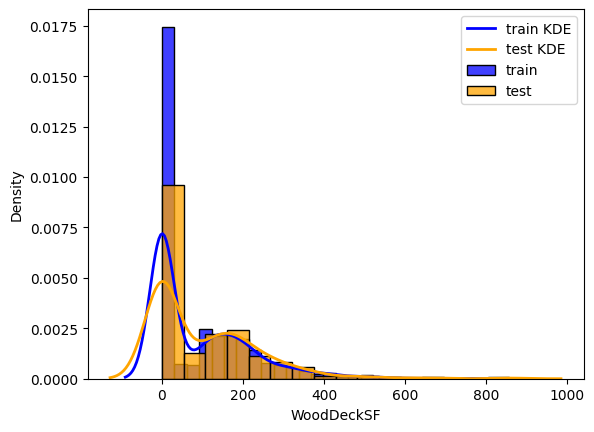

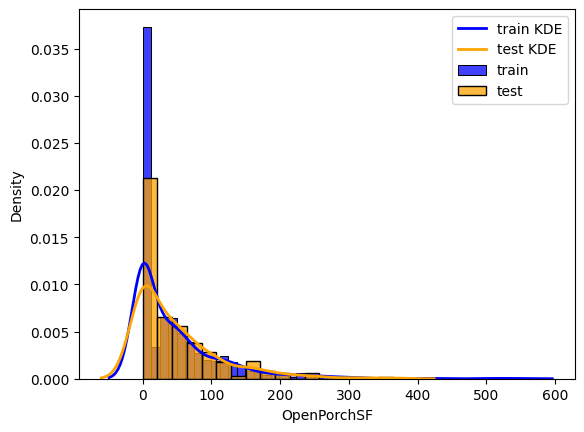

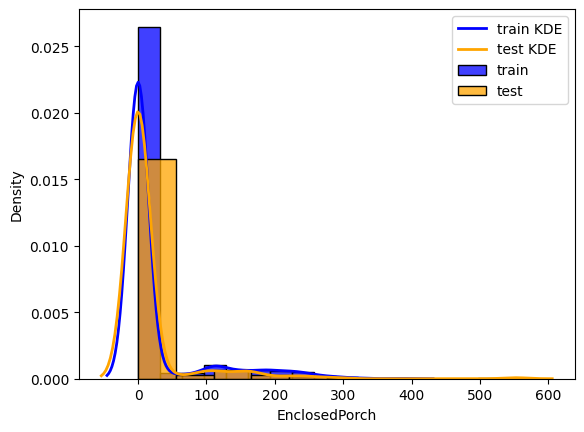

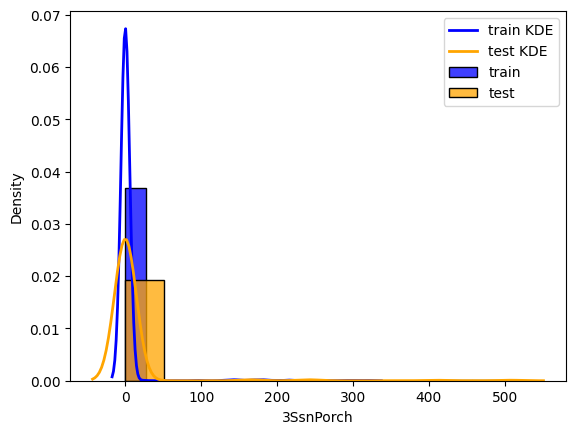

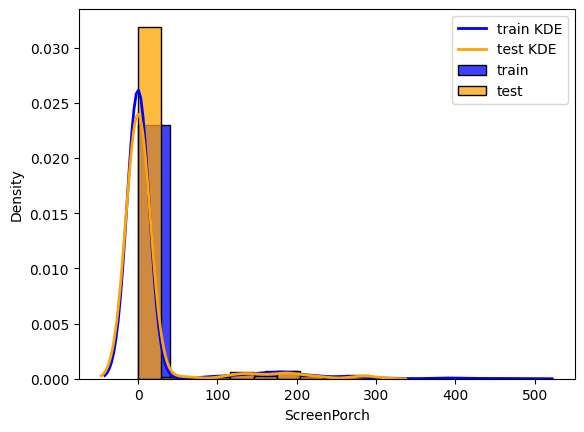

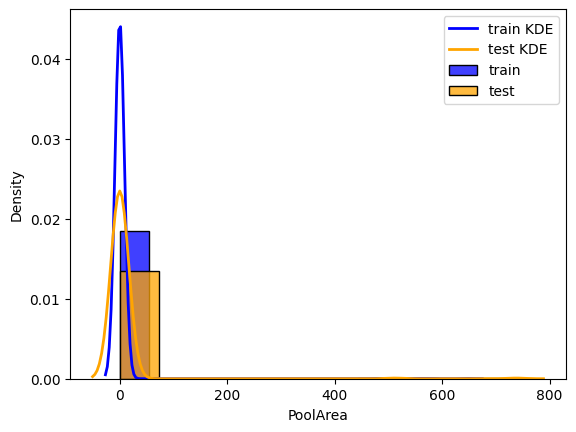

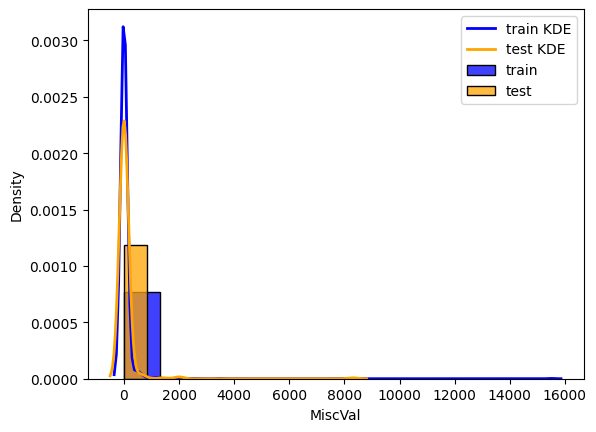

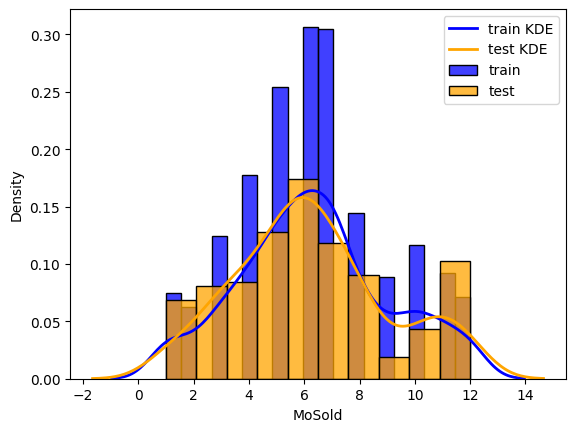

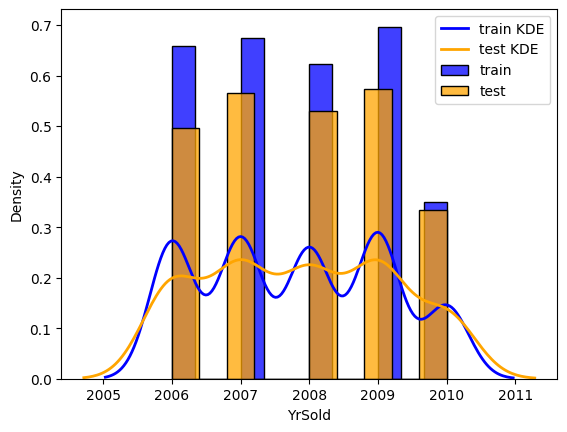

In [10]:
for col in X_test.columns:
    plt.figure()
    
    # Plot histograms for train and test
    sns.histplot(df_train[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
    
    # Overlay KDE plots for train and test
    sns.kdeplot(df_train[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
    
    plt.legend()
    plt.show()

&rarr; _Insight :_ The 1d density is similar from test to train.